# Исследование игр для интернет-магазина "Стримчик"



Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель:** Необходимо выявить определяющие успешность игры закономерности. 

Выявленные закономерности позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**
1. Name — название игры;
2. Platform — платформа;
3. Year_of_Release — год выпуска;
4. Genre — жанр игры;
5. NA_sales — продажи в Северной Америке (миллионы проданных копий);
6. EU_sales — продажи в Европе (миллионы проданных копий);
7. JP_sales — продажи в Японии (миллионы проданных копий);
8. Other_sales — продажи в других странах (миллионы проданных копий);
9. Critic_Score — оценка критиков (максимум 100);
10. User_Score — оценка пользователей (максимум 10);
11. Rating — рейтинг от организации ESRB.





## Откроем файл с данными и изучим общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Вывод**

Таким образом, представлены данные по 16715 позициям. Присутствуют пропуски в половине столбцов, а также несоответствующие колонкам типы данных.

## Предобработка данных 

Проверяем пропуски, дубликаты и аномалии в данных:

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


In [7]:
df.duplicated().sum()

0

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Здорово, что не забываешь про дубликаты.
</div>

In [8]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Рассмотреть по 2 пропуска в названии игр и жанрах.

Согласно данным наибольшие пропуски в столбцах с оценками (Critic_Score, User_Score) и рейтинге. Это может связано с тем, с одной стороны, что игры не были популярны и не получали оценок, с другой стороны, не было соответствующих платформ, на которых собирались бы данные по оценкам и рейтнингам. Например, самая старая игра вышла аж в 1980 г.

Столбец Year_of_Release	 необходимо перевести в тип int, поскольку представлены точные годы. 

Столбец User_Score необходимо из object в float64, так как речь идет о числовых значениях оценок. Некорректный тип данных отображается из-за аббревиатуры "tbd", означающей to be determined.


**Поэтому необходимо:**
 1. Привести названия столбцов к нижнему регистру для удобства;
 2. Преобразовать данные в нужные типы;
 3. При возможности обработать пропуски;
 4. Изучить аббревиатуру tbd в столбце user_score;
 5. Просчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
    

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Хороший план.
</div>

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Рассмотрим и заполним при возможности пропуски, а также изменим тип данных: 

In [10]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки с пропусками в названиях и жанрах совпадают. Также данные строки не информативны и их слишком мало, поэтому от них можно избавиться:

In [11]:
df.dropna(subset=['name'], inplace=True)

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верно.
</div>

Обратимся теперь к столбцу с годами релиза:

In [12]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Адекватно заполнить пропуски не получится, поскольку данные других столбцов не коррелируются с годом выпуска, даже год в названиях. Вносить отдельно займет много времени. Поскольку данных очень мало (1.6%), то можно либо заполнить нейтральными значениями, либо удалить. Воспользуемся вторым:

In [13]:
df.dropna(subset=['year_of_release'], inplace=True)

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верно, доля пропусков маленькая и для экономии времени их можно удалить.
</div>

И переведем данные в этом столбце в int:

In [14]:
df['year_of_release'] = df['year_of_release'].astype(int)

Рассмотрим tbd в оценках пользователей:

In [15]:
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Почти 14.5% игр отмечены оценками tbd. Не прослеживаю закономерностей c другими столбцами, как и нет возможности заполнить пропуски с учетом данных других данных, так как не будут в таком случае учитываться уникальность игр и реакции пользователей.
Высока вероятность, что данная аббревиатура является устоявшемся выражением to be determined (об этом также есть статья в британнике). Поэтому  tbd заменим на NaN, чтобы столбец привести к типу float:

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно, `tbd` означает `To Be Determined`, т.к. игра ещё не выпущена. Тут можно заменить заглушкой, а можно привести в nan
</div>

In [16]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

In [17]:
df['user_score'] = df['user_score'].astype(float)

Рассмотрим также, какие возрастные категории указаны в rating:
    

In [18]:
df.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Данные категории соответствуют  следующим **возрастным категориях от организации ESRB:**
1. E - для всех возрастных категорий;
2. T - подростки, старше 13 лет;
3. M - взрослые, старше 17 лет;
4. E10+ - старше 10 лет (ребёнок);
5. EC - для всех возрастных категорий, от 3 лет;
6. RP - рейтинг ожидается. ;
7. K-A - для всех возрастов (все), тоже самое, что и Е;
8. AO - только старше 18 лет.

RP используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. Поскольку у нас данные представлены по релизам, то данный рейтинг можно применить и к пропускам в столбце rating.

K-A - старое обозначение для Е, то также заменим. Также заменим EC на E. Для удобства объедими AO c близкой категорией M, так как в этой категории только одна игра.

In [19]:
df['rating'] = df['rating'].replace('K-A', 'E', regex=True)
df['rating'] = df['rating'].replace('EC', 'E', regex=True)
df['rating'] = df['rating'].replace('AO', 'M', regex=True)

In [20]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'] = df['rating'].replace('RP', 'unknown', regex=True)
df.rating.value_counts()

unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [21]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

Просмотрим исправленные данные:

In [22]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод:**

1. Сделали названия столбцов читабельными, приведя их к нижнему регистру;
2. Удалили пропуски в name, genre и year_of_release, поскольку нет возможности их заполнить подходящими  значениями из-за уникальности игр (название), с другой, из-за затратности заполнения (самостоятельный  поиск годов релиза). Данные пропуски занимают чуть больше 1.5% от всех данных, то есть не повлияют на дальнейшее исследование;
3. Исправили данные в столбце rating;
4. Заменили тип данных в столбцах year_of_release и user_score для удобства дальнейшего исследования;
5. Добавили столбец с суммарными продажами.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Отличная работа в предобработке. Наши данные готовы к исследовательскому анализу.
</div>

## Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы:**

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

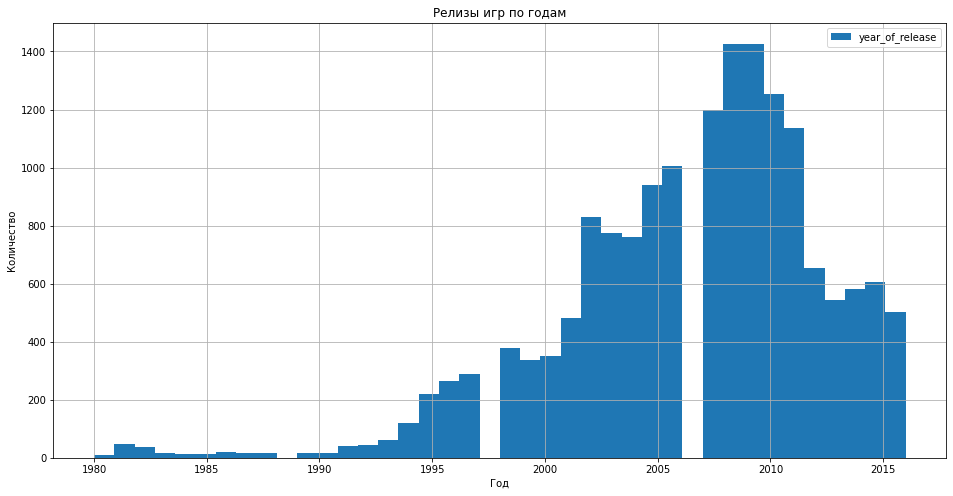

In [24]:
hist_game = df.plot(y = 'year_of_release', kind = 'hist', bins = 40, grid=True, figsize = (16,8), title='Релизы игр по годам')
hist_game.set_xlabel('Год')
hist_game.set_ylabel('Количество')
df['year_of_release'].describe()

In [25]:
df.groupby('year_of_release').agg({'name':'count'}).style.bar()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Из графиков видно, что с момента первого выпуска (1980 г.) не было значительного роста выпуска игр, он начинает наблюдаться с 1995 г., пик  пришелся на 2007-2010 годы, затем отмечается снижение выпуска игр. Можно предоположить, что данное снижение связано с такими явлениями, как усовершенствование мобильного гейминга на ios и android, а также со снижением производства ПК, консолей (вторая волна мирового экономического кризиса прошлась по Китаю - главному производителю).

**Посмотрим, как менялись продажи по платформам:**

Text(0.5, 1.0, 'Продажи игр по платформам')

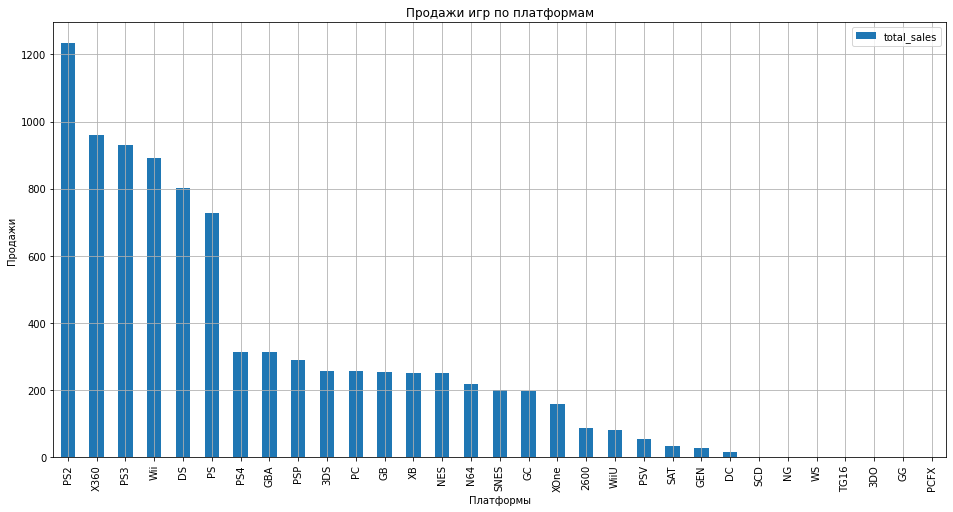

In [26]:
df.groupby('platform').agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', figsize=(16,8), grid=True)
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.title('Продажи игр по платформам')

В 6-ку лидеров входят платформы PlayStation(PS2, PS3, PS), X360, Wii, DS. Построем распределение по годам для данных лидеров:

In [28]:
def hist_plat(platform, title):
    df[df['platform'] == platform]\
        .groupby('year_of_release')\
        .agg({'total_sales':'sum'})\
        .plot(kind='bar', figsize=(3,3), grid=True)
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.title(title)

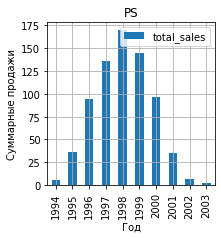

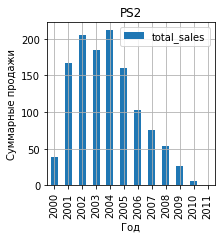

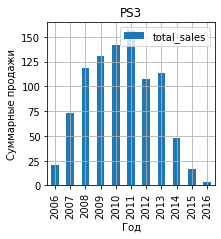

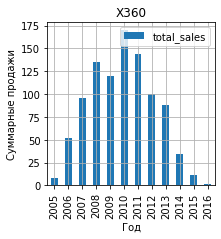

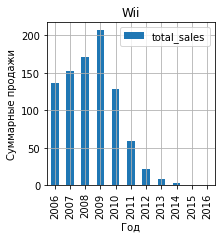

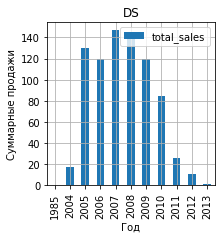

In [29]:
hist_plat('PS', 'PS')
hist_plat('PS2', 'PS2')
hist_plat('PS3', 'PS3')
hist_plat('X360', 'X360')
hist_plat('Wii', 'Wii')
hist_plat('DS', 'DS')


Из графиков видно, что в среднем платформа живет 9-10 лет, пик продаж приходится на 4-6 годы существования. Поскольку половину лидеров занимает Playstation, но нужно проследить, как происходит смена поколений у данной платформы:

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Жизненный цикл определили веррно.
</div>

In [30]:
PS = df[df['platform'] == 'PS']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})
PS2 = df[df['platform'] == 'PS2']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})
PS3 = df[df['platform'] == 'PS3']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales':'sum'})

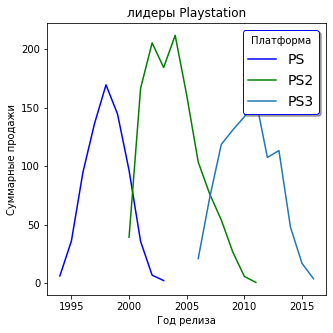

In [31]:
ax = plt.figure( figsize=(5, 5))
plt.plot(PS.year_of_release, PS.total_sales, 'b',
         PS2.year_of_release, PS2.total_sales, 'g',
         PS3.year_of_release, PS3.total_sales)
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи')
plt.title('лидеры Playstation')
plt.legend(['PS','PS2', 'PS3'], fontsize=14, shadow=True, facecolor='w', edgecolor='b', title='Платформа')


Как только популярность и снижение продаж снижаются, Playstation выпускает новое поколение платформ.


**Рассмотрим данные за актуальный период:**

Поскольку нам необходимо построить прогноз на 2017 год, то возьмем период за 2014-2016 гг. Это обусловлено не только продолжительностью сущестования платформ, а также одинаковыми тенденциями за эти годы(количество выпускаемых игр). 
Построим графики:

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верно, для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.
</div>

In [32]:
def pivot_plat(df):
    df.pivot_table(index='year_of_release', columns='platform',
                                values='total_sales',aggfunc=('sum')).plot(grid=True,
                                    figsize=(12, 8))

Text(0.5, 0, 'Год')

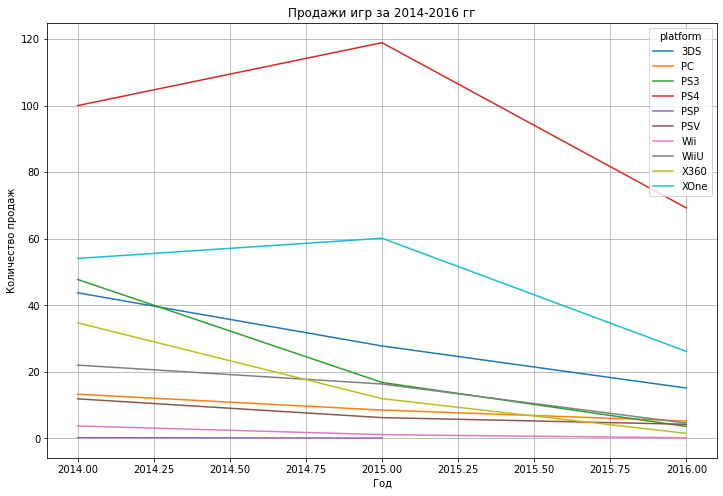

In [33]:
actual_df = df.query('year_of_release >= 2014')
pivot_plat(actual_df)
plt.title('Продажи игр за 2014-2016 гг')
plt.ylabel('Количество продаж')
plt.xlabel('Год')

In [34]:
pop_platform = pd.pivot_table(actual_df, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
pop_platform

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2014                    0.24
         2015                    0.12
PSV      2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2014                   54.07
         2015                   60.14
         2016                   26.15

Необходимо учесть, что данные за 2016 год являются неполными, поэтому на графиках виден нисходящая тенденция. Однако, если судить за весь период, то:
    1. У таких платформ, как PS4, XOne, WiiU, PSV, 3DS, высока вероятность роста продаж, у платформ Wii, PS3, X360 (старые, к ним приходят на смену другие) - обратная тенденция;
    2. Лидерами по продаж являются PS4, XOne, которые занимают чуть ли не половину рынка игр.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Согласен.
</div>

**Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам:**

(0.0, 4.0)

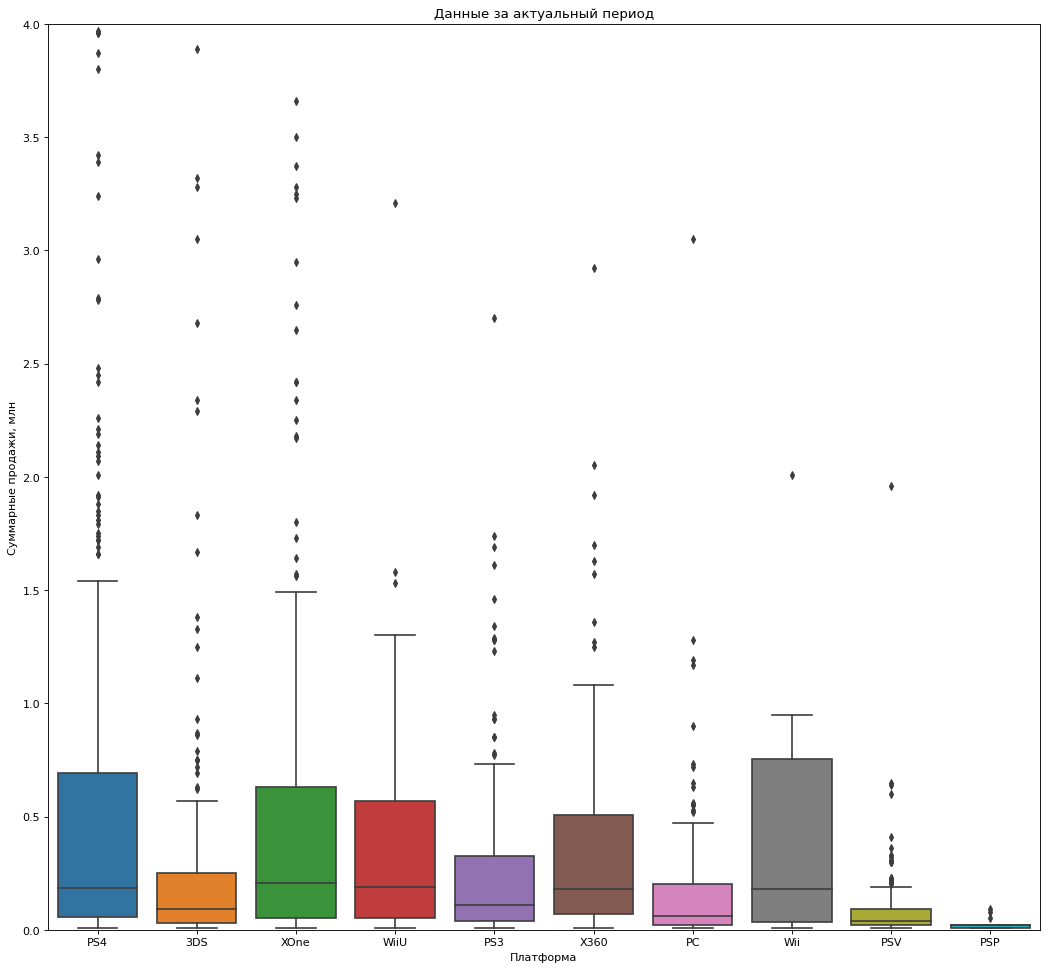

In [35]:
plt.figure(figsize=(16,15), dpi=80)
sns.boxplot(x='platform', y='total_sales', data=actual_df)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн')
plt.title('Данные за актуальный период')
plt.ylim([0, 4])


Присутствует разница в продажах. Практически у каждой платформы есть популярные игры, приносившие огромную прибыль. Можно проследить тенденцию к росту продаж у платформ от Playstation, у которых средняя больше 3-го квартиля, то есть создают более популярные игры.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Медиана и 75% квантиль наибольшая у PS4, WiiU, XOne - отличие выглядит весьма существенным. 
</div>

**Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков**
Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

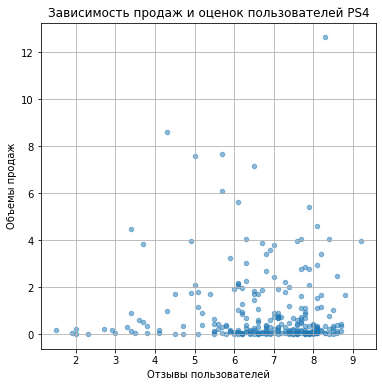

In [36]:
df[df['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(6,6), grid=True)
plt.title('Зависимость продаж и оценок пользователей PS4')
plt.ylabel('Объемы продаж')
plt.xlabel('Отзывы пользователей')
plt.show()

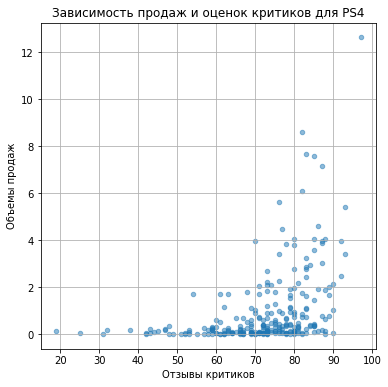

In [37]:
df[df['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(6,6), grid=True)
plt.title('Зависимость продаж и оценок критиков для PS4')
plt.ylabel('Объемы продаж')
plt.xlabel('Отзывы критиков')
plt.show()

In [38]:
ps4_df = actual_df.query('platform =="PS4"')
ps4_corr = ps4_df.loc[:,['total_sales', 'critic_score', 'user_score']]
ps4_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Для самой популярной платформы(PS4) линейная корреляция незначительная. Но можем заметить, что корреляция между оценками критиков и прибылью выше, чем между прибылью и оценками пользователей. Скорее всего пользователи при покупки игр ориентируются на отзывы критиков.

Посмотрим на остальные платформы:

In [39]:
threeds_df = actual_df.query('platform =="3DS"')
threeds_corr = threeds_df.loc[:,['total_sales', 'critic_score', 'user_score']]
threeds_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


In [40]:
x360_df = actual_df.query('platform =="X360"')
x360_corr = x360_df.loc[:,['total_sales', 'critic_score', 'user_score']]
x360_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


In [41]:
xone_df = actual_df.query('platform =="XOne"')
xone_corr = xone_df.loc[:,['total_sales', 'critic_score', 'user_score']]
xone_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


In [42]:
ps3_df = actual_df.query('platform =="PS3"')
ps3_corr = ps3_df.loc[:,['total_sales', 'critic_score', 'user_score']]
ps3_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


In [43]:
pc_df = actual_df.query('platform =="PC"')
pc_corr = pc_df.loc[:,['total_sales', 'critic_score', 'user_score']]
pc_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


In [44]:
psv_df = actual_df.query('platform =="PSV"')
psv_corr = psv_df.loc[:,['total_sales', 'critic_score', 'user_score']]
psv_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.042665,-0.168455
critic_score,0.042665,1.000000,0.524066
user_score,-0.168455,0.524066,1.000000


In [45]:
wiiu_df = actual_df.query('platform =="WiiU"')
wiiu_corr = wiiu_df.loc[:,['total_sales', 'critic_score', 'user_score']]
wiiu_corr.corr().style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


В целом ситуация схожа с корреляцией для PS4. Только выделяется немного 3DS, где на продажи также влияет и не отзывы пользователей.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Оценка критиков имеет слабое влияние на продажи, оценка пользователей на продажи не влияет.
    
Здорово, что посмотрел по всем платформам.
</div>

**Посмотрим на общее распределение игр по жанрам:**

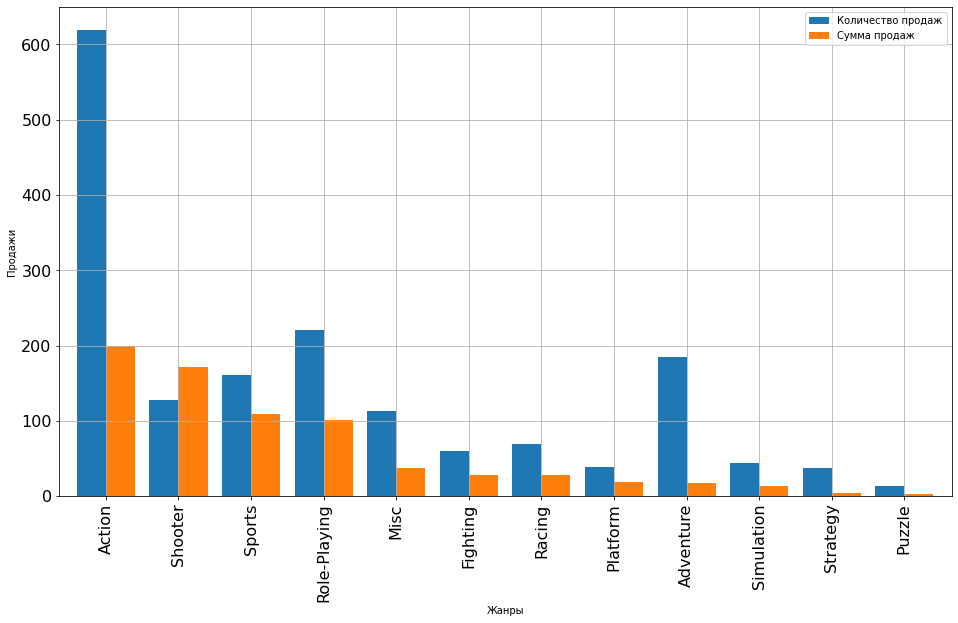

In [46]:
actual_df.pivot_table(index='genre', values='total_sales', aggfunc=('count', 'sum')

                                              ).sort_values('sum', ascending=False).plot(kind='bar', figsize=(16, 9),
                                                                   width=0.8, fontsize=(16), grid=True)
plt.rcParams.update({'font.size': 10})
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.legend(['Количество продаж', 'Cумма продаж'])

(0.0, 3.0)

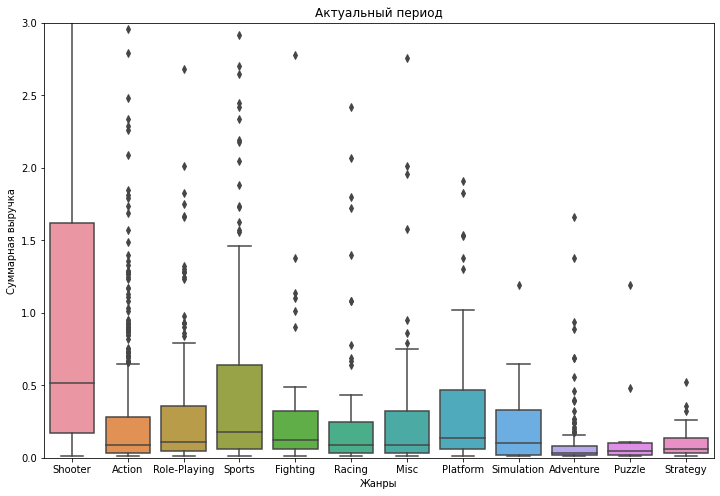

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=actual_df)
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка')
plt.title('Актуальный период')
plt.ylim([0, 3])


Самые прибыльными жанрами игр являются Action, затем идет Shooter, Sports, Role-Playining соответственно. Можно отметить, что жанр Shooter лидирует по средним продажам, что нельзя сказать о Action. Это можно обьяснить не только продуманностью игр жанра Sports, а также групповым характером. Про интеллектуальные игры можно сказать, что они не пользуются особой популярностью 

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Совершенно верно. Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.
</div>

**Вывод**:
1. Большей популярностью за актуальный период(2014-2016 гг.) у пользователей пользуются платформы семейств Playstation и Xbox, особенно PS4 и Xone;
2. В среднем платформы существуют 8-10 лет, затем к ним на смену приходят новое поколение платформ, пик популярности на 4-6 годы существования платформ;
2. С 2012 года падает популярность игр на ПК и консолях, предположено, что из-за роста популярности мобильного гейминга и роста цен на игры;
4. Топовые жанры игр: Shooters, Sports, Role-playing;
5. В целом, оценки критиков больше влияют на продажи, чем оценки пользователей.


<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Отличное резюме подраздела.
</div>

## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) **самые популярные платформы (топ-5):**

In [48]:
na_platforms = actual_df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False).head()
na_platforms['%'] = na_platforms['na_sales'] / na_platforms['na_sales'].sum() * 100
na_platforms

,na_sales,%
platform,,
PS4,98.61,38.996322
XOne,81.27,32.139044
X360,28.30,11.191521
3DS,22.64,8.953217
PS3,22.05,8.719896


In [49]:
eu_platforms = actual_df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head()
eu_platforms['%'] = eu_platforms['eu_sales'] / eu_platforms['eu_sales'].sum() * 100
eu_platforms

,eu_sales,%
platform,,
PS4,130.04,55.120380
XOne,46.25,19.604103
PS3,25.54,10.825704
PC,17.97,7.616989
3DS,16.12,6.832825


In [50]:
jp_platforms = actual_df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head()
jp_platforms['%'] = jp_platforms['jp_sales'] / jp_platforms['jp_sales'].sum() * 100
jp_platforms

,jp_sales,%
platform,,
3DS,44.24,47.915087
PS4,15.02,16.267735
PSV,14.54,15.747861
PS3,11.22,12.152063
WiiU,7.31,7.917253


Text(0.5, 1.0, 'Платформы Японии')

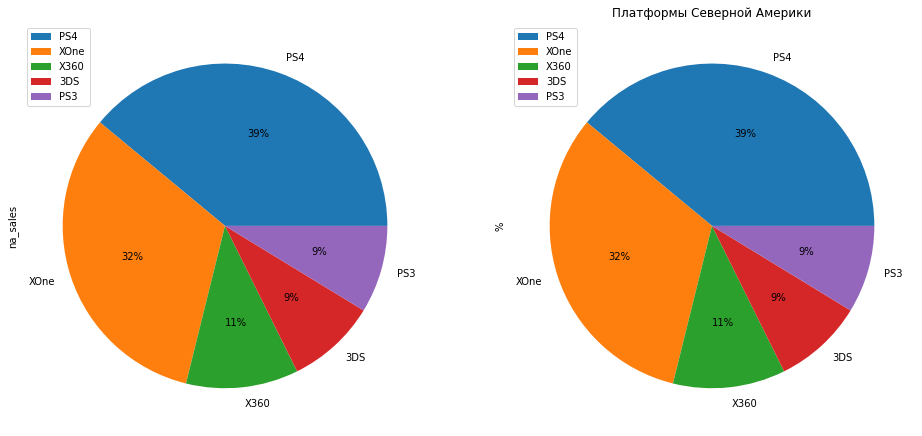

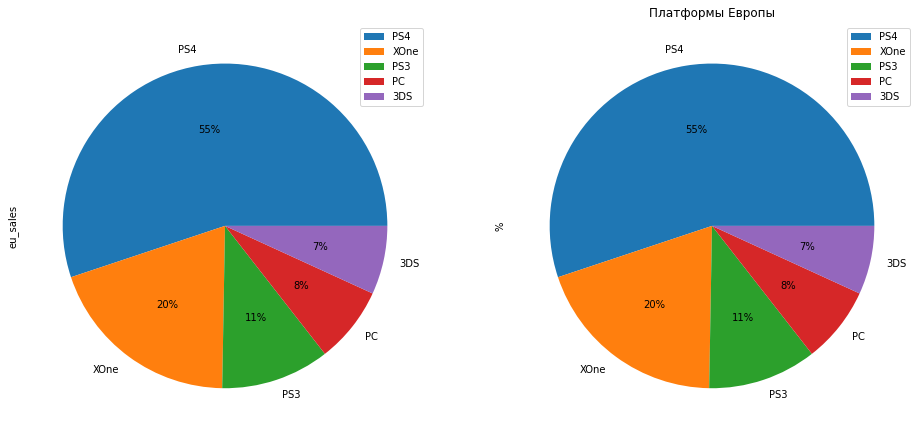

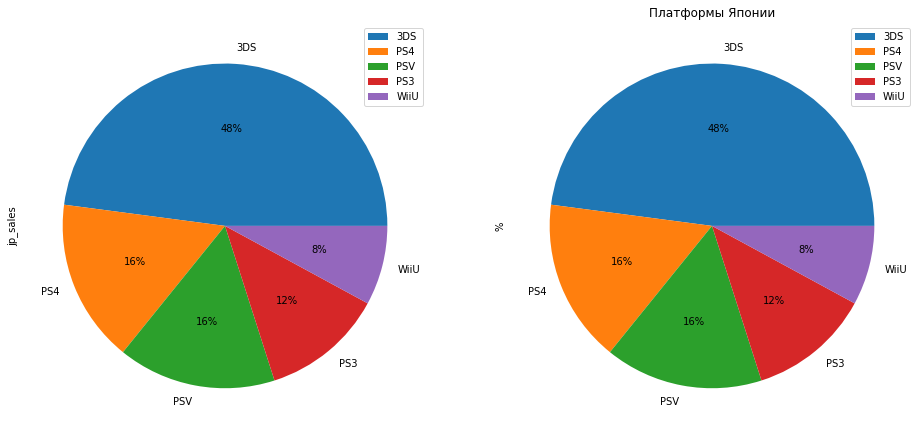

In [62]:
na_platforms.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(16,8))
plt.title('Платформы Северной Америки')
eu_platforms.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(16,8))
plt.title('Платформы Европы')
jp_platforms.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(16,8))
plt.title('Платформы Японии')

**Рейтинг по платформам:**

1. Северная Америка: PS4, XOne, X360, 3DS, PS3
2. Европа: PS4, XOne, PS3, PS3, PC, 3DS.
3. Япония: 3DS, PS4, PSV, PS3, WiiU.

В Северной Америке и в Европе наиболее популярны PS4. В Европе данная платформа занимает чуть больше половины рынка. В Северной Америке Xone немногим уступает PS4, а вместе с X360 занимает почти половину рынка. Это обусловлено тем, что  Xone и X360 - платформы Xbox - являются местными, то есть американскими платформами. Поэтому на американском рынке видна конкуренция между Playstation и Xbox.

Аналогичная ситуация в Японии, где местная платформа вполне успешно 3DS конкурирует с Playstation.

**Самые популярные жанры (топ-5):**

In [52]:
na_platforms_g = actual_df.pivot_table(index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head()
na_platforms_g['%'] = na_platforms_g['na_sales'] / na_platforms_g['na_sales'].sum() * 100
na_platforms_g

,na_sales,%
genre,,
Shooter,79.02,32.095857
Action,72.53,29.459789
Sports,46.13,18.736799
Role-Playing,33.47,13.594639
Misc,15.05,6.112916


In [53]:
eu_platforms_g = actual_df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head()
eu_platforms_g['%'] = eu_platforms_g['eu_sales'] / eu_platforms_g['eu_sales'].sum() * 100
eu_platforms_g

,eu_sales,%
genre,,
Action,74.68,32.721378
Shooter,65.52,28.707882
Sports,45.73,20.036805
Role-Playing,28.17,12.342812
Racing,14.13,6.191123


In [54]:
jp_platforms_g = actual_df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head()
jp_platforms_g['%'] = jp_platforms_g['jp_sales'] / jp_platforms_g['jp_sales'].sum() * 100
jp_platforms_g 

,jp_sales,%
genre,,
Role-Playing,31.16,40.159814
Action,29.58,38.123470
Fighting,6.37,8.209821
Misc,5.61,7.230313
Shooter,4.87,6.276582


Text(0.5, 1.0, 'Жанры Японии')

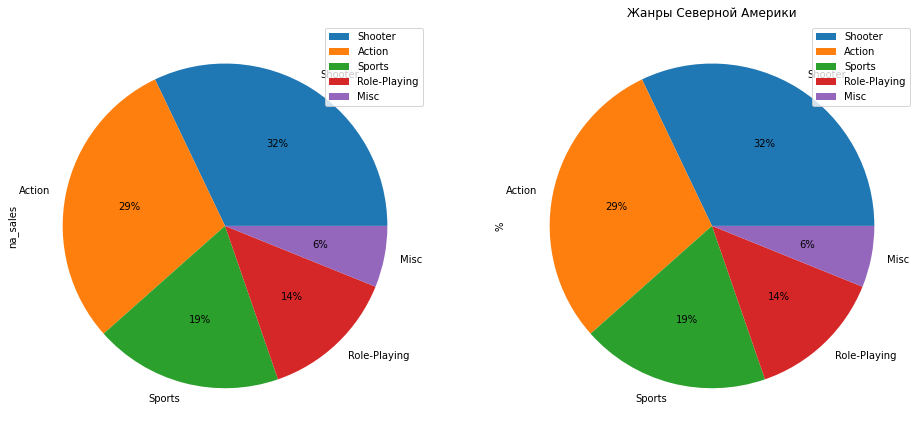

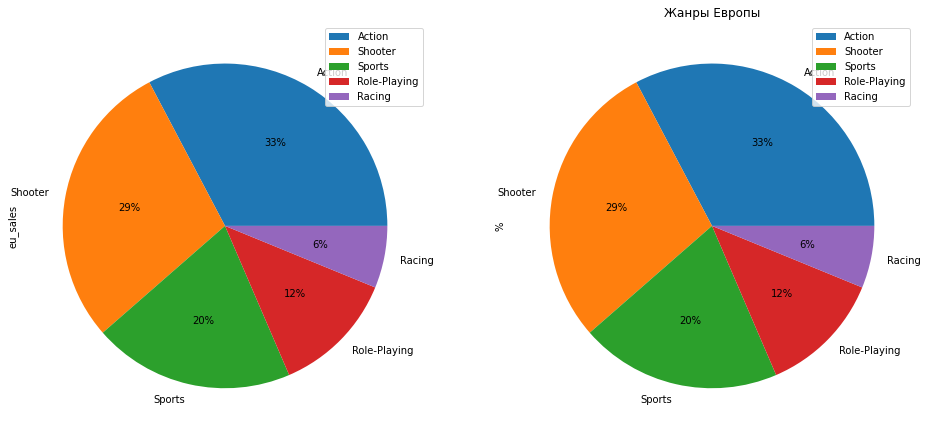

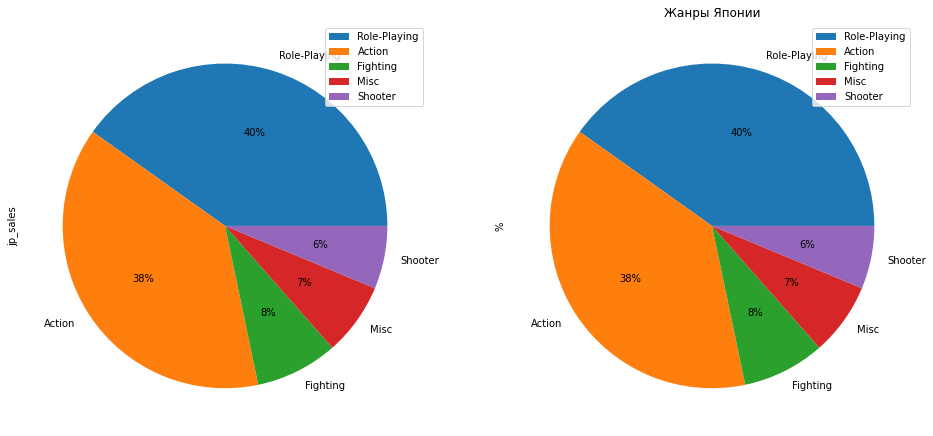

In [63]:
na_platforms_g.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(16,8))
plt.title('Жанры Северной Америки')
eu_platforms_g.plot(kind='pie', subplots=True, autopct='%1.0f%%',  figsize=(16,8))
plt.title('Жанры Европы')
jp_platforms_g.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(16,8))
plt.title('Жанры Японии')

**Рейтинг по жанрам:**

1. Северная Америка: Shooter,Action, Sports, Role-Playing, Misc	
2. Европа: Action, Shooter, Sports, Role-Playing, Racing	
3. Япония:Role-Playing, Action, Fighting, Misc, Shooter.

У американских и европейских пользователей предпочтения по жанрам схожи, больше половины предпочитают Action и Shooter. В Японии также как и в Европе и Северной Америке треть пользователей предпочитает Action, но в Японии все наибольшей популярностью пользуется Role-Playing.

**Влияние рейтинга ESRB:**

In [56]:
na_platforms_r = actual_df.pivot_table(index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head()
na_platforms_r['%'] = na_platforms_r['na_sales'] / na_platforms_r['na_sales'].sum() * 100
na_platforms_r

,na_sales,%
rating,,
M,96.42,33.943533
unknown,64.72,22.783919
E,50.74,17.862423
T,38.95,13.711892
E10+,33.23,11.698233


In [57]:
eu_platforms_r = actual_df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head()
eu_platforms_r['%'] = eu_platforms_r['eu_sales'] / eu_platforms_r['eu_sales'].sum() * 100
eu_platforms_r

,eu_sales,%
rating,,
M,93.44,34.520467
unknown,58.95,21.778484
E,58.06,21.449682
T,34.07,12.586818
E10+,26.16,9.664549


In [58]:
jp_platforms_r = actual_df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head()
jp_platforms_r['%'] = jp_platforms_r['jp_sales'] / jp_platforms_r['jp_sales'].sum() * 100
jp_platforms_r 

,jp_sales,%
rating,,
unknown,56.90,61.123644
T,14.78,15.877108
E,8.94,9.603609
M,8.01,8.604576
E10+,4.46,4.791062


Text(0.5, 1.0, 'ESRB в Японии')

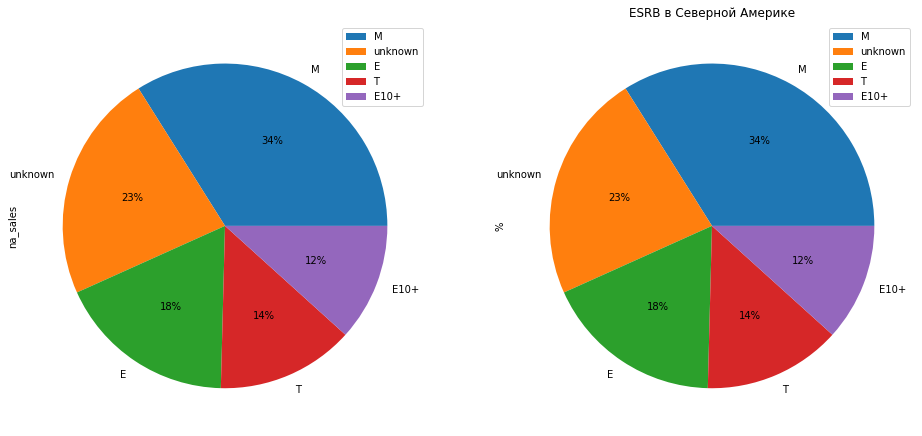

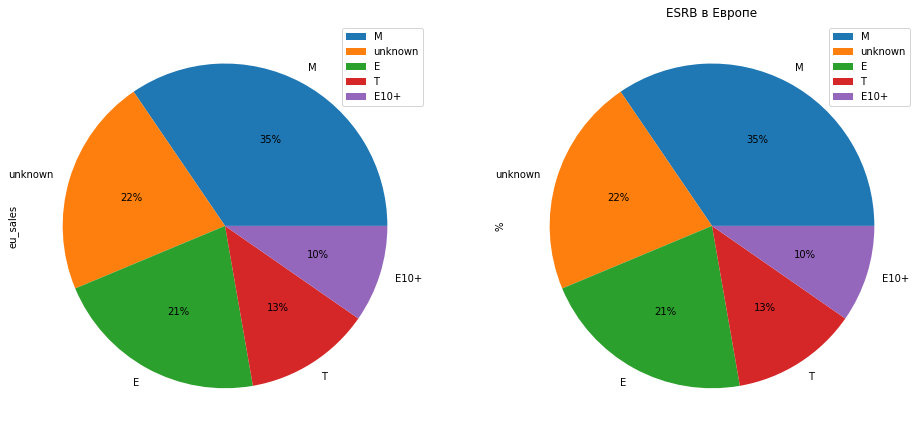

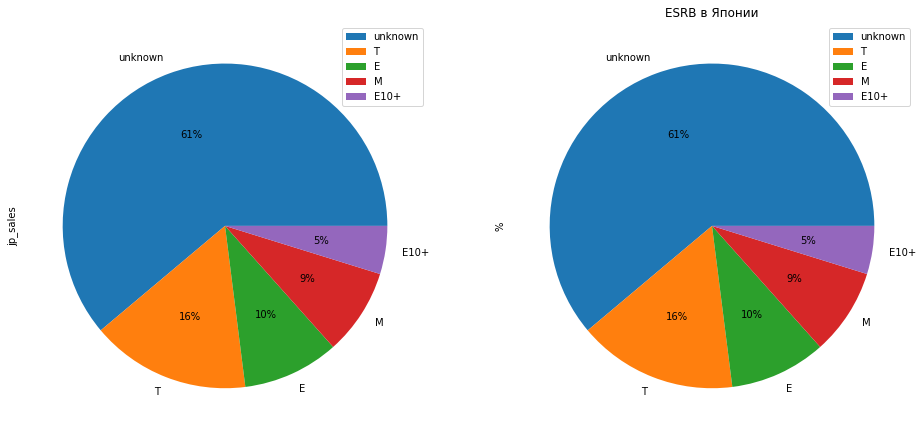

In [64]:
na_platforms_r.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(16,8))
plt.title('ESRB в Северной Америке')
eu_platforms_r.plot(kind='pie', subplots=True, autopct='%1.0f%%',  figsize=(16,8))
plt.title('ESRB в Европе')
jp_platforms_r.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(16,8))
plt.title('ESRB в Японии')

Здесь также видим различия между Японией и остальными регионами.
В США и Европе предпочитают игры рейтинга M (старше 17 лет) - больше трети продаж, затем больше 20 % - игры рейтинга E,т.е. для всех. Можно обьяснить тем, что Также для 20% игр не были установлены категории рейтинга.
В Японии ESRB не популярен, поэтому большая часть игр без данных категорий. Между тем заметно, что японские пользователи предпояитают игры для подростков и для всей семьи.

NB! Отсутствует информация по возрасту пользователей, покупательной способности, чтобы можно было привязать взаимосвязь рейтинга, его категории к предпочтениям. Возможно, в Японии строже на законодательном уровне регулируется продажа игр для детей и подростков и\или присутствует собственная система рейтингов. 




**Вывод:**

1. Портрет пользователя Северной Америки: PS4, XOne являются наиболее предпочитаемыми платформами; наибольший спрос на игры жанров Shooter и Action и категорий M(старше 17 лет) и Е (для всей семьи);
2. Портрет пользователя Европы: PS4, XOne являются наиболее предпочитаемыми платформами; наибольший спрос на игры жанров Shooter и Action и категорий M(старше 17 лет) и Е (для всей семьи);
3. Портрет пользователя Японии: 3DS, PS4 являются наиболее предпочитаемыми платформами; наибольший спрос на игры жанров Role-Playing и Action; ESRB не играет существенной роли (2/3 игр без маркировок), остальные категорий T (старше 13 лет) и Е (для всей семьи).

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Да, NA и EU очень похожи между собой, в то время, как Япония более самобытна.
    
Хороший EDA, вопросов к нему нет.
</div>

## Проверка гипотез

Необходимо проверить следующие гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

Так как сравниваемые выборки не зависимы между собой, будем использовать T-критерий Стьюдента.



Сформулируем нулевые гипотезы для **первой гипотезы:**

H0 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1 Средние пользовательские рейтинги платформ Xbox One и PC разные.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Здорово, что сразу формулируешь гипотезы.
</div>

In [60]:
xone_hyp = actual_df.query('platform == "XOne"')['user_score'].dropna()

pc_hyp = actual_df.query('platform == "PC"')['user_score'].dropna()


alpha = .01 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу



results = st.ttest_ind(xone_hyp, pc_hyp)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу




Сформулируем нулевые гипотезы для **второй гипотезы:**

Н0 Средние пользовательские рейтинги жанров Action и Sports одинаковые;

Н1 Средние пользовательские рейтинги жанров Action и Sports разные.

In [61]:
xone_hyp = actual_df.query('genre == "Action"')['user_score'].dropna()

pc_hyp = actual_df.query('genre == "Sports"')['user_score'].dropna()


alpha = .01

results = st.ttest_ind(xone_hyp, pc_hyp)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод:**
Обе предложенные гипотезы на основании имеющихся данных не удалось опровергнуть. 

## Общий вывод

1. Перед тем, как приступить к исследовательскому анализу, была проведена подготовка данных: названия столбцов приведены к нижнему регистру, удалены или заполнены пропуски, исправлены типы данных в year_of_release и user_score, рассмотрена аббревиатура tbd в user_score и заменена на nan. Все действия были обоснованы;
2. Изучен актуальный период (2014-2016 гг.), выявлено, что у пользователей пользуются платформы семейства Playstation и Xbox; в среднем платформы существуют 8-10 лет, популярность - на 4 год их существования;
3. Было отмечено, что с 2012 года падает популярность игр на ПК и консолях, предположено, что из-за роста популярности мобильного гейминга и роста цен на игры. Также выяснено, что отзывы критиков сильнее влияют на продажи, чем отзывы пользователей;
4. Были составлены портреты пользователей для Северной Америки, Европы и Японии. Во всех регионах популярна платформа PS4. Установлено, что в Северной Америке и Европе c PS4 конкурирует Xone, наибольший спрос на игры жанров Shooter и Action, категорий М(старше 17 лет) и Е (для всех) от ESRB. В Японии c PS4 конкурирует 3DS, а ESRB не играет существенной роли для классификации игр(2/3 игр без маркировок от  ESRB);
5. Были подтверждены следующие гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"; "Средние пользовательские рейтинги жанров Action и Sports разные".


<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Ты очень серьезно подходишь к визуализации.

Вот пара ссылок на полезные источники:https://habr.com/ru/company/otus/blog/540526/, https://pythonru.com/biblioteki/seaborn-plot
</div>